In [2]:
import pandas as pd
import numpy as np
import os

columns = ['Sim_ID', 'Stable', 'Norbits', 'beta1', 'beta2']
for i in ['1', '2', '3']:
    columns += ['M'+i, 'a'+i, 'P'+i, 'e'+i, 'pomega'+i, 'inc'+i, 'Omega'+i, 'f'+i]
columns += ['Rel_Eerr', 'integ_time']

frames = []
path = '/mnt/raid-cita/dtamayo/newstability/data/csvs/'
for f in os.listdir(path):
        if f.startswith('run'):
            frames.append(pd.read_csv(path+f, names=columns, index_col=0))

df = pd.concat(frames)
df = df.sort_index()
df.tail()

,Stable,Norbits,beta1,beta2,M1,a1,P1,e1,pomega1,inc1,...,M3,a3,P3,e3,pomega3,inc3,Omega3,f3,Rel_Eerr,integ_time
Sim_ID,,,,,,,,,,,,,,,,,,,,,
2000,False,4.301289e+04,9.812796,8.845887,0.000002,1.0,0.999999,0.004404,2.201010,0.028936,...,0.000724,1.802076,2.418241,0.083166,3.926272,0.003723,1.369279,-0.142107,3.043739e-05,1.355654
2001,True,1.000000e+09,9.829601,18.864927,0.000122,1.0,0.999939,0.015727,1.717250,0.020411,...,0.000010,1.721459,2.258480,0.004569,-3.408993,0.012968,-2.928854,2.422548,2.108001e-08,30411.896301
2002,True,1.000000e+09,13.819980,11.209475,0.000061,1.0,0.999970,0.037847,-1.200530,0.022319,...,0.000360,2.144017,3.138707,0.004776,3.767455,0.030739,2.378411,-2.663301,2.714556e-06,29740.017660
2003,True,1.000000e+09,10.862075,18.926354,0.000056,1.0,0.999972,0.006871,3.822591,0.034742,...,0.000008,1.649359,2.118159,0.019104,-0.599383,0.005469,0.184760,2.009610,7.880449e-08,29959.438198
2004,False,1.629000e+01,2.051263,17.005466,0.000003,1.0,0.999999,0.001094,0.966261,0.010693,...,0.000079,1.578497,1.983105,0.001437,-3.876588,0.075444,-3.091599,2.207598,3.181931e-06,0.022913


In [20]:
df.shape

(2000, 30)

(array([ 254.,  258.,  233.,  212.,  254.,  251.,  214.,  161.,  112.,   51.]),
 array([-2.99973426, -2.76099506, -2.52225586, -2.28351665, -2.04477745,
        -1.80603825, -1.56729904, -1.32855984, -1.08982064, -0.85108143,
        -0.61234223]),
 <a list of 10 Patch objects>)

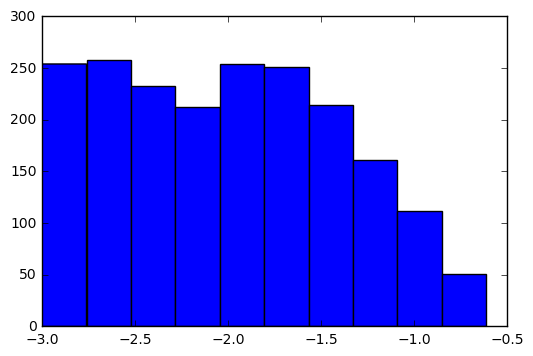

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.log10(df['e1']))

In [4]:
10**(-.5)

0.31622776601683794

(array([  21.,  117.,  189.,  189.,  173.,  170.,  162.,  149.,  124.,  706.]),
 array([-0.74472749,  0.22974525,  1.204218  ,  2.17869075,  3.1531635 ,
         4.12763625,  5.102109  ,  6.07658175,  7.0510545 ,  8.02552725,  9.        ]),
 <a list of 10 Patch objects>)

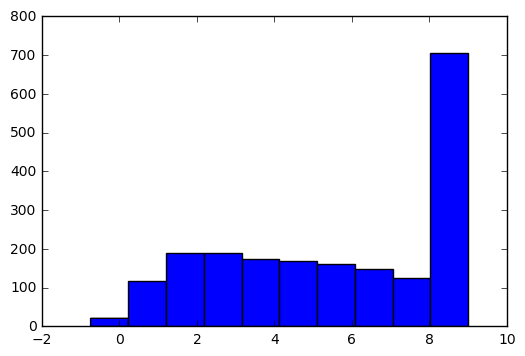

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.log10(df['Norbits']))

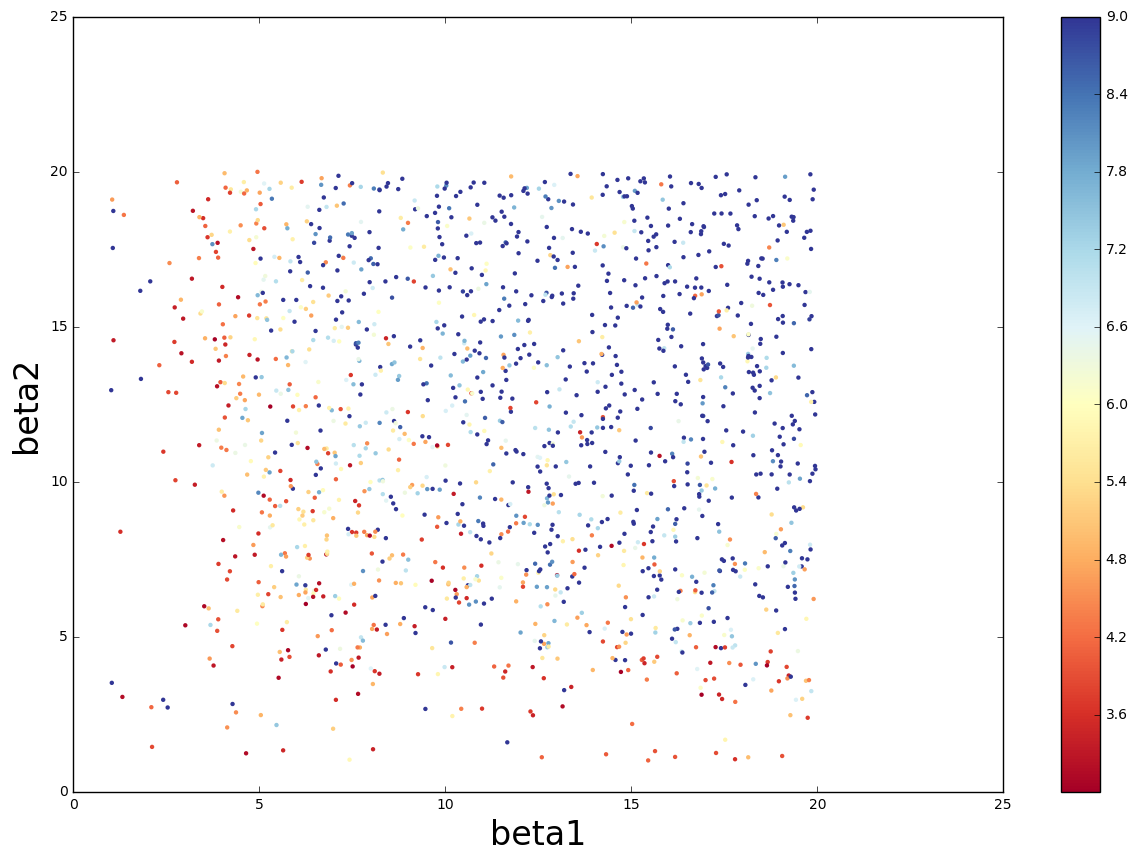

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
cm = plt.cm.get_cmap('RdYlBu')
dfplot = df.loc[df["Norbits"] > 1000.]
sc = ax.scatter(dfplot['beta1'], dfplot['beta2'], c=np.log10(dfplot['Norbits']), edgecolor='', s=10,cmap=cm)
ax.set_xlabel('beta1', fontsize=24)
ax.set_ylabel('beta2', fontsize=24)
plt.colorbar(sc)

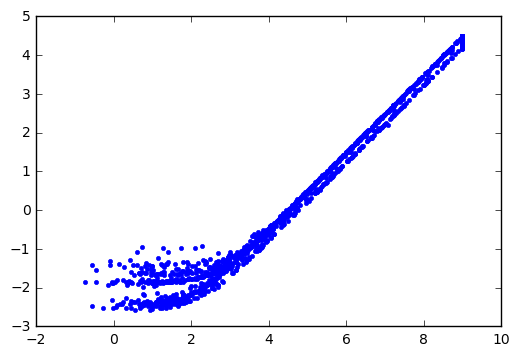

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.log10(df['Norbits']), np.log10(df['integ_time']), '.')

In [25]:
df["Stable"].value_counts()

False    1379
True      621
Name: Stable, dtype: int64

In [28]:
df["integ_time"].max()

31446.013113000001

In [34]:
df.loc[df["Norbits"] < 1000.].shape

(496, 30)

In [40]:
df["integ_time"].sum()/3600

4781.8741791009725

In [3]:
df["integ_time"].max()/100

314.46013113000004